<a href="https://colab.research.google.com/github/adam-bozman/RoboAdvisor/blob/main/M%26ARoboAdvisorAnalysis_071024_Insample_4o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT4o's Predictive Capacity | Value Enhancing

## 4o Insample Setup

In [ ]:
# Load Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import re
from scipy import stats

In [ ]:
# Load the Excel file
file_path = "/content/drive/My Drive/RoboAdvisor/07_2024/results/4o/ValueEnhancing4oResults.xlsx"
# sheet_name = 'outsampleresults'
df = pd.read_excel(file_path)

In [ ]:
df.tail()

,Source.Name,dealno,anndate,Target,Acquirer,effdate,withdate,form,pct_cash,pct_other,...,Acquirer List,aCAR_MM_Window1_1_1,aCAR_MM_Window2_2_2,aCAR_RAW_Window1_1_1,aCAR_RAW_Window2_2_2,tCAR_MM_Window1_1_20,tCAR_MM_Window2_1_63,tCAR_RAW_Window1_1_20,tCAR_RAW_Window2_1_63,Prompt_1_Response
1142,ValueEnhancing4osample2.xlsx,4176297020,2023-12-27,Hartree Partners LP-Natural Ga,Williams Cos Inc,2024-01-03,NaT,Acq. of Assets,NaN,NaN,...,NaN,-0.012332,-0.009283,-0.005986,-0.003988,0.102395,0.136934,0.172974,0.249371,**Decrease**\n\n1. **Acquisition Premium:** Wi...
1143,ValueEnhancing4osample2.xlsx,4177450020,2023-12-28,Marriott-SpringHill Suites,Apple Hospitality REIT Inc,2023-12-28,NaT,Acq. of Assets,NaN,100.0,...,NaN,-0.012796,-0.013811,-0.014825,-0.010688,0.022850,-0.013773,0.099531,0.160341,**Increase**\n\n1. **Strategic Fit and Synergi...
1144,ValueEnhancing4osample2.xlsx,4178034020,2023-12-28,Advanced Micro Instruments Inc,Enpro Inc,2024-01-30,NaT,Acq. of Assets,NaN,100.0,...,NaN,-0.013973,0.002472,-0.013344,0.009643,NaN,NaN,NaN,NaN,**Decrease**\n\n1. **Acquisition Premium:** En...
1145,ValueEnhancing4osample2.xlsx,4177687020,2023-12-28,Key Knife Inc,Kadant Inc,2024-01-02,NaT,Merger,NaN,100.0,...,NaN,-0.012780,-0.003532,-0.013599,0.002164,NaN,NaN,NaN,NaN,**Increase**\n\n1. **Strategic Fit and Synergi...
1146,ValueEnhancing4osample2.xlsx,4204423020,2023-12-31,Undisclosed Care Facilities(4),Sabra Health Care REIT Inc,2023-12-31,NaT,Acq. of Assets,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,**Increase**\n\n1. **Growth Potential:** Acqui...


## Functions to Parse Answers

In [ ]:
# Function to process each response
def process_response(response):
    # Initialize result dictionary
    result = {'Primary_Response': 'Invalid Response', 'Reasons': ''}

    # Strip leading/trailing whitespace and split response into lines
    lines = response.strip().split('\n')

    # Extract primary response
    if lines:
        primary_response = lines[0].strip().lower().replace('*', '')  # Remove asterisks and strip whitespace
        primary_response = primary_response.strip("'\"")  # Remove leading/trailing quotation marks
        if primary_response in ['increase', 'decrease', 'no change']:
            result['Primary_Response'] = primary_response.capitalize()

    # Extract reasons only if the primary response is valid
    if result['Primary_Response'] != 'Invalid Response':
        reasons = []
        for line in lines[1:]:
            cleaned_line = line.strip().replace('*', '')  # Remove asterisks and strip whitespace
            match = re.match(r'^\d+\.\s([^:]+):', cleaned_line)
            if match:
                reasons.append(match.group(1).strip())
        if reasons:
            result['Reasons'] = '; '.join(reasons)

    return result

In [ ]:
# Apply the function to the Prompt_1_Response column
df[['Primary_Response', 'Reasons']] = df['Prompt_1_Response'].apply(lambda x: pd.Series(process_response(x)))

In [ ]:
df.head()

,Source.Name,dealno,anndate,Target,Acquirer,effdate,withdate,form,pct_cash,pct_other,...,aCAR_MM_Window2_2_2,aCAR_RAW_Window1_1_1,aCAR_RAW_Window2_2_2,tCAR_MM_Window1_1_20,tCAR_MM_Window2_1_63,tCAR_RAW_Window1_1_20,tCAR_RAW_Window2_1_63,Prompt_1_Response,Primary_Response,Reasons
0,ValueEnhancing4osample1.xlsx,3810227020,2021-10-01,Undisclosed Healthcare Co,i3 Verticals Inc,2021-10-01,NaT,Acq. of Assets,NaN,100.0,...,0.032039,-0.078940,0.022089,NaN,NaN,NaN,NaN,**Increase**\n\n1. **Market Perception of Syne...,Increase,Market Perception of Synergies; Growth Potenti...
1,ValueEnhancing4osample1.xlsx,3813311020,2021-10-01,Infinity Infusion Nursing LLC,Option Care Health Inc,2021-10-01,NaT,Acq. of Assets,NaN,100.0,...,0.036801,0.020590,0.038199,NaN,NaN,NaN,NaN,**Increase**\n\n1. **Strategic Synergies**: Th...,Increase,Strategic Synergies; Market Position Strengthe...
2,ValueEnhancing4osample1.xlsx,3854117020,2021-10-01,Luby's Inc-Re Ppty(26),Store Capital Corp,2021-10-01,NaT,Acq. of Assets,NaN,100.0,...,0.002719,0.008299,0.002682,-0.074415,-0.285483,0.138843,0.202044,**Decrease**\n\n1. **Acquisition Premium:** St...,Decrease,Acquisition Premium; Integration Risks; Debt F...
3,ValueEnhancing4osample1.xlsx,3809428020,2021-10-03,DentaQuest LLC,Sun Life Financial Inc,2022-06-01,NaT,Merger,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,**Decrease**\n\n1. **Acquisition Premium:** Su...,Decrease,Acquisition Premium; Integration Risks; Debt F...
4,ValueEnhancing4osample1.xlsx,3809885020,2021-10-04,"Elmira Savings Bank.Elmira,NY",Community Bank System Inc,2022-05-16,NaT,Merger,100.0,NaN,...,0.015700,0.033977,0.018452,0.623178,0.545816,0.652974,0.638742,**Increase**\n\n1. **Market Expansion and Syne...,Increase,Market Expansion and Synergies; Economies of S...


## Save the Output

In [ ]:
# Set path variables
path_to_google_drive = '/content/drive/My Drive/RoboAdvisor/07_2024/results/Cleaned/'
filename = 'ValueEnhancingResponses_Cleaned_Insample_4o.xlsx'

# Define global path
path = path_to_google_drive + filename

# Save the cleaned and updated dataframe to a new Excel file
df.to_excel(path, index=False)

## Statistical Significance & Accuracy of Responses

In [ ]:
# Filter out rows with empty CAR values
car_columns = ['aCAR_MM_Window1_1_1', 'aCAR_MM_Window2_2_2', 'aCAR_RAW_Window1_1_1', 'aCAR_RAW_Window2_2_2']
df = df.dropna(subset=car_columns)

In [ ]:
# Calculate average returns for each response category
response_groups = df.groupby('Primary_Response')[car_columns].mean()

In [ ]:
# Calculate statistical significance
response_results = {}
for response in df['Primary_Response'].unique():
    if response != 'Invalid Response':
        subset = df[df['Primary_Response'] == response]
        stats_results = {}
        for col in car_columns:
            stats_results[col] = {
                'mean': subset[col].mean(),
                'std': subset[col].std(),
                'count': subset[col].count(),
                't-stat': stats.ttest_1samp(subset[col].dropna(), 0).statistic,
                'p-value': stats.ttest_1samp(subset[col].dropna(), 0).pvalue
            }
        response_results[response] = stats_results

# Print the results
for response, results in response_results.items():
    print(f"Results for {response}:")
    for col, stats in results.items():
        print(f"  {col}: mean={stats['mean']}, std={stats['std']}, count={stats['count']}, t-stat={stats['t-stat']}, p-value={stats['p-value']}")

Results for Increase:
  aCAR_MM_Window1_1_1: mean=0.007394176177970932, std=0.07653972356007335, count=441, t-stat=2.028720414903479, p-value=0.04308846834643549
  aCAR_MM_Window2_2_2: mean=0.0032797888049875207, std=0.08860414001546679, count=441, t-stat=0.7773402562534321, p-value=0.43737578126723176
  aCAR_RAW_Window1_1_1: mean=0.010078085274037139, std=0.08224270341209103, count=441, t-stat=2.57335644348074, p-value=0.010398216159447308
  aCAR_RAW_Window2_2_2: mean=0.007579144359231436, std=0.09567159895073005, count=441, t-stat=1.6636288437682227, p-value=0.09689864022133111
Results for Decrease:
  aCAR_MM_Window1_1_1: mean=-0.001672542919942174, std=0.10358922166291318, count=671, t-stat=-0.41823845479869637, p-value=0.6759067999099025
  aCAR_MM_Window2_2_2: mean=-0.006793521451485857, std=0.10796627004982914, count=671, t-stat=-1.629926847245697, p-value=0.1035869624850948
  aCAR_RAW_Window1_1_1: mean=0.00011812021913038497, std=0.10582687203076595, count=671, t-stat=0.028912759

## Functions to Aggregate Common Reasons/Terms

In [ ]:
# Load libraries
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Function to calculate reason frequencies
def calculate_reason_frequencies(reasons):
    all_reasons = '; '.join(reasons).split('; ')
    reason_freq = Counter(all_reasons)
    return reason_freq

# Function to plot word cloud
def plot_wordcloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

In [ ]:
# Separate data into value-enhancing and non-value-enhancing deals
value_enhancing = df[df['Primary_Response'] == 'Increase']
non_value_enhancing = df[df['Primary_Response'].isin(['Decrease', 'No change'])]

In [ ]:
# Calculate reason frequencies for each group
full_sample_reason_freq = calculate_reason_frequencies(df['Reasons'])
value_enhancing_reason_freq = calculate_reason_frequencies(value_enhancing['Reasons'])
non_value_enhancing_reason_freq = calculate_reason_frequencies(non_value_enhancing['Reasons'])

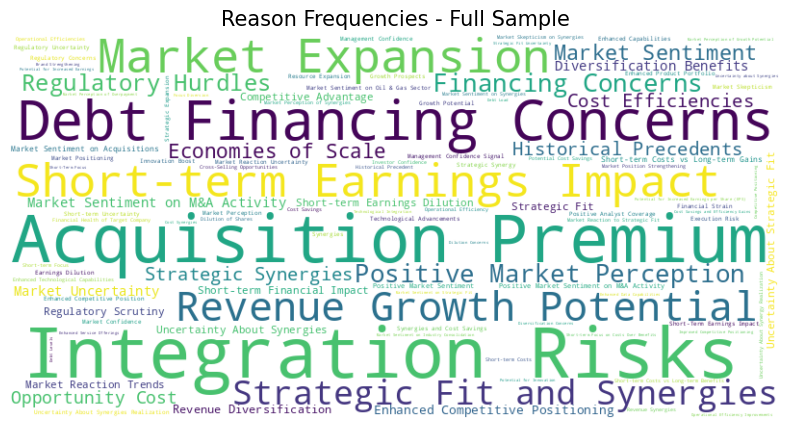

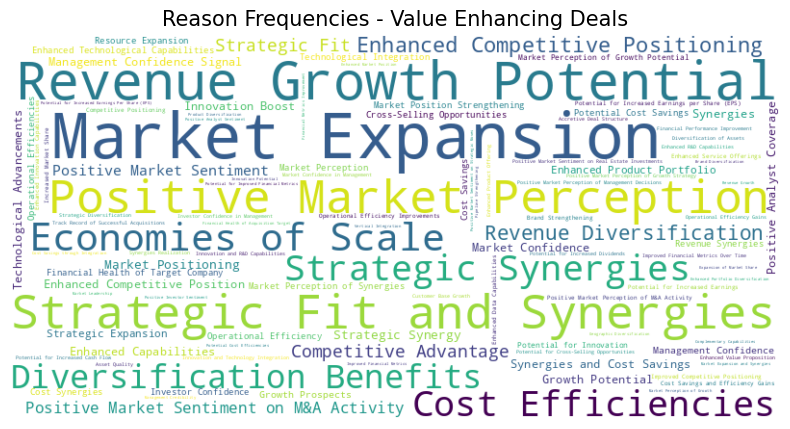

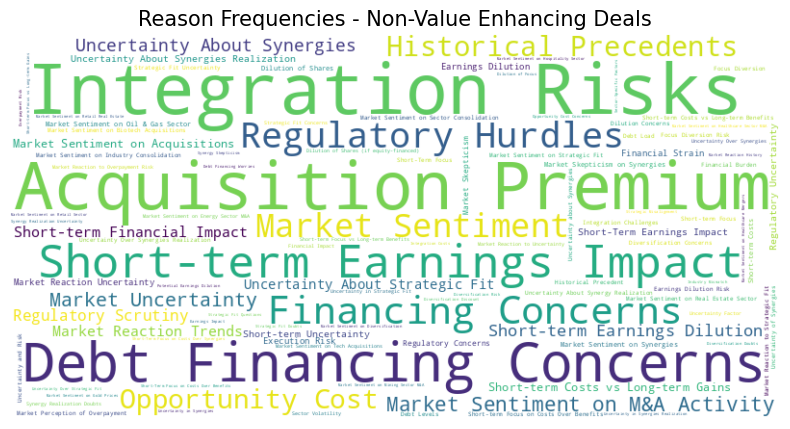

In [ ]:
# Plot word clouds for each group
plot_wordcloud(full_sample_reason_freq, 'Reason Frequencies - Full Sample')
plot_wordcloud(value_enhancing_reason_freq, 'Reason Frequencies - Value Enhancing Deals')
plot_wordcloud(non_value_enhancing_reason_freq, 'Reason Frequencies - Non-Value Enhancing Deals')

In [ ]:
# Optionally, print the most common reasons for each group
print("Most common reasons - Full Sample:", full_sample_reason_freq.most_common(20))
print("Most common reasons - Value Enhancing Deals:", value_enhancing_reason_freq.most_common(20))
print("Most common reasons - Non-Value Enhancing Deals:", non_value_enhancing_reason_freq.most_common(20))

Most common reasons - Full Sample: [('Integration Risks', 656), ('Acquisition Premium', 605), ('Debt Financing Concerns', 387), ('Market Expansion', 272), ('Short-term Earnings Impact', 258), ('Revenue Growth Potential', 201), ('Strategic Fit and Synergies', 192), ('Positive Market Perception', 184), ('Financing Concerns', 182), ('Regulatory Hurdles', 159), ('Market Sentiment', 135), ('Economies of Scale', 121), ('Strategic Synergies', 101), ('Cost Efficiencies', 99), ('Historical Precedents', 96), ('Opportunity Cost', 89), ('Market Sentiment on M&A Activity', 84), ('Diversification Benefits', 81), ('Market Uncertainty', 77), ('Enhanced Competitive Positioning', 76)]
Most common reasons - Value Enhancing Deals: [('Market Expansion', 272), ('Revenue Growth Potential', 201), ('Strategic Fit and Synergies', 192), ('Positive Market Perception', 184), ('Economies of Scale', 121), ('Strategic Synergies', 101), ('Cost Efficiencies', 99), ('Diversification Benefits', 81), ('Enhanced Competitiv

## Create a Dataframe of `Reasons`

In [ ]:
# Create a DataFrame for the most common reasons
common_reasons = list(set(list(full_sample_reason_freq.keys()) + list(value_enhancing_reason_freq.keys()) + list(non_value_enhancing_reason_freq.keys())))

data = {
    'Reason': common_reasons,
    'Full Sample': [full_sample_reason_freq.get(reason, 0) for reason in common_reasons],
    'Value Enhancing Deals': [value_enhancing_reason_freq.get(reason, 0) for reason in common_reasons],
    'Non-Value Enhancing Deals': [non_value_enhancing_reason_freq.get(reason, 0) for reason in common_reasons]
}

df_common_reasons = pd.DataFrame(data)
df_common_reasons = df_common_reasons.sort_values(by='Full Sample', ascending=False)

In [ ]:
# Display the DataFrame
df_common_reasons.head()

,Reason,Full Sample,Value Enhancing Deals,Non-Value Enhancing Deals
459,Integration Risks,656,0,656
261,Acquisition Premium,605,0,605
439,Debt Financing Concerns,387,0,387
630,Market Expansion,272,272,0
34,Short-term Earnings Impact,258,0,258


## Save the Output

In [ ]:
# Save the DataFrame to an Excel file
output_file_path = '/content/drive/My Drive/RoboAdvisor/07_2024/results/Cleaned/ValueEnhancingReasonsInsample4o.xlsx'
df_common_reasons.to_excel(output_file_path, index=False)